In [1]:
# verify version
!python --version

Python 3.12.8


In [2]:
!pip install --upgrade luxai-s3

In [3]:
import os
import sys
import numpy as np
import random

In [4]:
os.listdir("../../Data/lux-ai-season-3/")

['main.py', 'agent.py', 'lux', 'README.md']

In [5]:
!mkdir Test

mkdir: cannot create directory ‘Test’: File exists


In [6]:
!cp -r ../../Data/lux-ai-season-3/* Test/

# My Agent

In [7]:
prac_array = np.array([1, 2, 3, 2])
prac_array

array([1, 2, 3, 2])

In [8]:
prac_condition = prac_array <= 2
prac_condition

array([ True,  True, False,  True])

In [9]:
prac_result = prac_array[prac_condition]
prac_result

array([1, 2, 2])

In [10]:
prac_array = np.array([[1, 2], [3, 4], [5, 6]])
prac_array

array([[1, 2],
       [3, 4],
       [5, 6]])

In [11]:
5 in prac_array

True

In [12]:
7 in prac_array

False

In [13]:
empty_list = []

In [14]:
empty_list

[]

In [17]:
np.zeros((4, 4, 4)).shape

(4, 4, 4)

In [18]:
random.uniform(0, 1)

0.23482025786568617

In [19]:
Q_table = np.zeros((4, 4, 4))
Q_table.shape

(4, 4, 4)

In [20]:
np.argmax(Q_table)

np.int64(0)

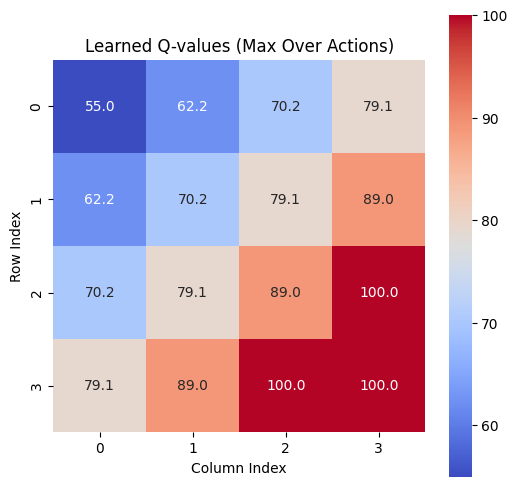

In [22]:
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Define the environment (4x4 Grid)
GRID_SIZE = 4
ACTIONS = ["UP", "DOWN", "LEFT", "RIGHT"]
ACTION_MAP = {0: (-1, 0), 1: (1, 0), 2: (0, -1), 3: (0, 1)}

# Q-learning parameters
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.2  # Exploration probability
num_episodes = 5000  # Training episodes

# Initialize Q-table (4x4 grid, 4 possible actions)
Q_table = np.zeros((GRID_SIZE, GRID_SIZE, len(ACTIONS)))
Q_table[GRID_SIZE - 1, GRID_SIZE - 1, :] = 100  # Set all actions at (3,3) to 100

# Define reward function
def get_reward(state):
    return 100 if state == (GRID_SIZE - 1, GRID_SIZE - 1) else -1  # Goal = 100, Else = -1

# Function to choose action (ε-greedy)
def choose_action(state):
    if random.uniform(0, 1) < epsilon:  # Explore
        return random.choice(range(len(ACTIONS)))
    else:  # Exploit (choose best action)
        return np.argmax(Q_table[state[0], state[1]])

# Training loop
for episode in range(num_episodes):
    state = (0, 0)  # Start position
    while state != (GRID_SIZE - 1, GRID_SIZE - 1):
        action = choose_action(state)
        move = ACTION_MAP[action]
        next_state = (max(0, min(GRID_SIZE - 1, state[0] + move[0])),
                      max(0, min(GRID_SIZE - 1, state[1] + move[1])))

        reward = get_reward(next_state)

        # If next state is goal, set its Q-value directly
        if next_state == (GRID_SIZE - 1, GRID_SIZE - 1):
            Q_table[state[0], state[1], action] = reward  # Directly assign goal reward
        else:
            # Standard Q-learning update rule
            Q_table[state[0], state[1], action] += alpha * (
                reward + gamma * np.max(Q_table[next_state[0], next_state[1]]) - Q_table[state[0], state[1], action]
            )

        state = next_state  # Move to next state


# Extract the maximum Q-values for each state
best_q_values = np.max(Q_table, axis=2)

# Visualize the Q-table as a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(best_q_values, annot=True, fmt=".1f", cmap="coolwarm", square=True, cbar=True)

plt.title("Learned Q-values (Max Over Actions)")
plt.xlabel("Column Index")
plt.ylabel("Row Index")
plt.show()

In [24]:
np.random.random((24, 24))

array([[0.44168948, 0.10980563, 0.74846856, 0.66582517, 0.72341394,
        0.76292476, 0.39658154, 0.03468326, 0.15061202, 0.00501942,
        0.94353908, 0.36526987, 0.24097076, 0.84270105, 0.45144259,
        0.83581298, 0.45088305, 0.18594139, 0.14616621, 0.98524628,
        0.43080665, 0.77949535, 0.41563643, 0.80468611],
       [0.29414088, 0.0074837 , 0.28803499, 0.2293772 , 0.40984191,
        0.9551709 , 0.52343038, 0.29580537, 0.87007377, 0.97866764,
        0.48119279, 0.82559817, 0.96471303, 0.86195958, 0.4377032 ,
        0.44058322, 0.43618131, 0.13124468, 0.36070838, 0.58313258,
        0.05108645, 0.23302153, 0.05040599, 0.21053293],
       [0.08331891, 0.42731943, 0.04211094, 0.04540576, 0.18002732,
        0.78325169, 0.10054319, 0.22951868, 0.2184451 , 0.58646965,
        0.48341426, 0.83754764, 0.17726349, 0.21634175, 0.4323663 ,
        0.01879004, 0.45773244, 0.87295991, 0.60978061, 0.87380989,
        0.93457954, 0.81539615, 0.36576051, 0.03150792],
       [0.826

In [ ]:
%%writefile Test/agent.py

from lux.utils import direction_to
import sys
import numpy as np


# Helper functions
def manhattan_distance(pos1, pos2):
    return abs(pos1[0] - pos2[0]) + abs(pos1[1] - pos2[1])

def absolute_distance(pos1, pos2):
    return max(abs(pos1[0] - pos2[0]), abs(pos1[1] - pos2[1]))

def find_opposite_corner_coords(array, row, col):
    """
    Given a 2D array and a coordinate (row, col), this function returns the opposite corner coordinates.

    :param array: 2D list or NumPy array
    :param row: Row index of the given point
    :param col: Column index of the given point
    :return: (row', col') - Opposite corner coordinates
    """
    num_rows = len(array)
    num_cols = len(array[0]) if num_rows > 0 else 0

    # Opposite coordinates
    opp_row = num_rows - 1 - row
    opp_col = num_cols - 1 - col

    return (opp_row, opp_col)


# Classes

class TileType:
    unknown = -1
    empty = 0
    asteroid = 1
    nebula = 2

class ActionType:
    center = 0
    up = 1
    right = 2
    down = 3
    left = 4
    sap = 5

class Tile:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.type = TileType.unknown
        self.energy = None
        self.is_visible = False
        self.is_relic = False
        self.is_reward = False
        self.is_explored = False
        self.is_explored_for_relic = False
        self.is_explored_for_reward = False
        
    @property
    def coordinates(self):
        return (self.x, self.y)
        
    @property
    def is_walkable(self):
        return self.type != NodeType.asteroid


#class Fleet:
#    def __init__(self, 






class Agent():
    def __init__(self, player: str, env_cfg) -> None:
        self.player = player
        self.enemy_player = "player_1" if self.player == "player_0" else "player_0"
        self.team_id = 0 if self.player == "player_0" else 1
        self.enemy_team_id = 1 if self.team_id == 0 else 0
        #np.random.seed(0)
        self.env_cfg = env_cfg
        self.unit_move_cost = env_cfg['unit_move_cost']
        self.unit_sap_cost = env_cfg['unit_sap_cost']
        self.unit_sap_range = env_cfg['unit_sap_range']
        self.unit_sensor_range = env_cfg['unit_sensor_range']
        self.map_height = env_cfg['map_height']
        self.map_width = env_cfg['map_width']
        self.min_unit_sap_dropoff_factor = 1
        self.min_sap_power = self.unit_sap_cost * self.min_unit_sap_dropoff_factor
        self.my_spawn_location = None
        self.enemy_spawn_location = None
        self.first_spawn = False

        self.map_explored_status = np.zeros((self.map_height, self.map_width), dtype=int)
        
        self.relic_node_positions = []
        self.discovered_relic_nodes_ids = set()
        self.unit_explore_locations = dict()

    def act(self, step: int, obs, remainingOverageTime: int = 60):
        """implement this function to decide what actions to send to each available unit. 
        
        step is the current timestep number of the game starting from 0 going up to max_steps_in_match * match_count_per_episode - 1.
        """

        # units
        unit_positions = np.array(obs["units"]["position"][self.team_id]) # shape (max_units, 2)
        enemy_unit_positions = np.array(obs["units"]["position"][self.enemy_team_id]) # shape (max_units, 2)

        unit_energys = np.array(obs["units"]["energy"][self.team_id]) # shape (max_units, 1)
        enemy_unit_energys = np.array(obs["units"]["energy"][self.enemy_team_id]) # shape (max_units, 1)

        # units_mask
        unit_mask = np.array(obs["units_mask"][self.team_id]) # shape (max_units, )
        enemy_unit_mask = np.array(obs["units_mask"][self.enemy_team_id]) # shape (max_units, )

        # sensor_mask
        sensor_mask = obs['sensor_mask']

        # map_features
        map_features = obs['map_features']
        current_map_energy = map_features['energy']
        current_map_tile_type = map_features['tile_type']

        # update map explored status
        self.map_explored_status[current_map_tile_type != -1] = 1
        
        observed_relic_node_positions = np.array(obs["relic_nodes"]) # shape (max_relic_nodes, 2)
        observed_relic_nodes_mask = np.array(obs["relic_nodes_mask"]) # shape (max_relic_nodes, )
        team_points = np.array(obs["team_points"]) # points of each team, team_points[self.team_id] is the points of the your team
        
        # ids of units you can control at this timestep
        available_unit_ids = np.where(unit_mask)[0]
        enemy_available_unit_ids = np.where(enemy_unit_mask)[0]

        if available_unit_ids.shape[0] == 0:
            pass
        else:
            if self.first_spawn == False:
                first_unit_id = available_unit_ids[0]
                first_unit_pos = unit_positions[first_unit_id]
                self.my_spawn_location = (first_unit_pos[0], first_unit_pos[1])
                self.enemy_spawn_location = find_opposite_corner_coords(self.map_explored_status, first_unit_pos[0], first_unit_pos[1])
                self.first_spawn = True
        
        # visible relic nodes
        visible_relic_node_ids = set(np.where(observed_relic_nodes_mask)[0])
        
        actions = np.zeros((self.env_cfg["max_units"], 3), dtype=int)


        # basic strategy here is simply to have some units randomly explore and some units collecting as much energy as possible
        # and once a relic node is found, we send all units to move randomly around the first relic node to gain points
        # and information about where relic nodes are found are saved for the next match
        
        # save any new relic nodes that we discover for the rest of the game.
        for id in visible_relic_node_ids:
            if id not in self.discovered_relic_nodes_ids:
                self.discovered_relic_nodes_ids.add(id)
                self.relic_node_positions.append(observed_relic_node_positions[id])


        # combat algorithms
        all_attack_units = []
        firing_solutions = {}
        if enemy_available_unit_ids.shape[0] != 0:
            for enemy_unit_id in enemy_available_unit_ids:
                enemy_unit_pos = enemy_unit_positions[enemy_unit_id]
                enemy_unit_energy = enemy_unit_energys[enemy_unit_id]

                if enemy_unit_energy >= 0:
                
                    group = []
                    group_damage = 0
                    for unit_id in available_unit_ids:
                        unit_pos = unit_positions[unit_id]
                        unit_energy = unit_energys[unit_id]
                        enemy_distance = absolute_distance(unit_pos, enemy_unit_pos)
                        if group_damage < enemy_unit_energy:
                            if enemy_distance <= self.unit_sap_range:
                                if unit_energy >= self.unit_sap_cost:
                                    if unit_id not in all_attack_units:
                                        group_damage += self.unit_sap_cost
                                        group.append(unit_id)
                                        
                        else:
                            continue
                    attack_group = []
                    if group_damage >= enemy_unit_energy:
                        for unit_id in group:
                            attack_group.append(unit_id)
                            all_attack_units.append(unit_id)

                    firing_solutions[f"{enemy_unit_id}"] = attack_group


        
        # unit ids range from 0 to max_units - 1
        for unit_id in available_unit_ids:
            unit_pos = unit_positions[unit_id]
            unit_energy = unit_energys[unit_id]

            # randomly explore by picking a random location on the map and moving there for about 20 steps
            if step % 20 == 0 or unit_id not in self.unit_explore_locations:
                rand_loc = (np.random.randint(0, self.env_cfg["map_width"]), np.random.randint(0, self.env_cfg["map_height"]))
                self.unit_explore_locations[unit_id] = rand_loc
            actions[unit_id] = [direction_to(unit_pos, self.unit_explore_locations[unit_id]), 0, 0]

        if len(firing_solutions) > 0:
            for enemy_unit_id in firing_solutions.keys():
                attack_group = firing_solutions[enemy_unit_id]
                enemy_unit_id = int(enemy_unit_id)
                enemy_unit_pos = enemy_unit_positions[enemy_unit_id]
    
                for attack_unit_id in attack_group:
                    attack_unit_pos = unit_positions[attack_unit_id]
                    dx = enemy_unit_pos[0] - attack_unit_pos[0]
                    dy = enemy_unit_pos[1] - attack_unit_pos[1]
                    actions[attack_unit_id] = [5, dx, dy]            
                
        return actions

In [ ]:
!luxai-s3 Test/main.py Test/main.py --output=replay_my_agent.html

In [ ]:
            '''
            # Sap
            if unit_energy >= self.unit_sap_cost:
                if enemy_available_unit_ids.shape[0] != 0:
                    visible_enemy_unit_positions = enemy_unit_positions[enemy_available_unit_ids]
                    visible_enemy_unit_energys = enemy_unit_energys[enemy_available_unit_ids]
                    visible_enemy_unit_distances = np.array([absolute_distance(unit_pos, visible_enemy_unit_pos) for visible_enemy_unit_pos in visible_enemy_unit_positions])
                    
                    enemies_within_sap_range = visible_enemy_unit_distances <= self.unit_sap_range
                    enemies_within_sap_range_positions = visible_enemy_unit_positions[enemies_within_sap_range]
                    enemies_within_sap_range_energys = visible_enemy_unit_energys[enemies_within_sap_range]
                    
                    killable_enemies = enemies_within_sap_range_energys <= self.min_sap_power
                    killable_enemy_positions = enemies_within_sap_range_positions[killable_enemies]
                    killable_enemy_energys = enemies_within_sap_range_energys[killable_enemies]
                    
                    if killable_enemy_positions.shape[0] > 0:
                        random_target = np.random.randint(killable_enemy_positions.shape[0])
                        random_target_positions = killable_enemy_positions[random_target]
                        random_target_energy = killable_enemy_energys[random_target]
                        if random_target_energy >= 0:
                            dx = random_target_positions[0] - unit_pos[0]
                            dy = random_target_positions[1] - unit_pos[1]
                            actions[unit_id] = [5, dx, dy]
                            continue
            '''

                    
                    '''
                    min_enemy_distance = visible_enemy_unit_distances.min()
                    if min_enemy_distance <= self.unit_sap_range:
                        neariest_enemies = visible_enemy_unit_distances == min_enemy_distance
                        neariest_enemy_pos = visible_enemy_unit_positions[neariest_enemies]
                        first_neariest_enemy_pos = neariest_enemy_pos[0]
                        dx = first_neariest_enemy_pos[0] - unit_pos[0]
                        dy = first_neariest_enemy_pos[1] - unit_pos[1]
                        actions[unit_id] = [5, dx, dy]
                        continue
                    '''
            '''
            if len(self.relic_node_positions) > 0:
                first_relic_node_position = self.relic_node_positions[0]
                distance_from_unit_to_first_relic = manhattan_distance(unit_pos, first_relic_node_position)
                
                # if close to the relic node we want to hover around it and hope to gain points
                if distance_from_unit_to_first_relic <= 4:
                    random_direction = np.random.randint(0, 5)
                    actions[unit_id] = [random_direction, 0, 0]
                    
                else:
                    # otherwise we want to move towards the relic node
                    actions[unit_id] = [direction_to(unit_pos, first_relic_node_position), 0, 0]
                    
            else:
                # randomly explore by picking a random location on the map and moving there for about 20 steps
                if step % 20 == 0 or unit_id not in self.unit_explore_locations:
                    rand_loc = (np.random.randint(0, self.env_cfg["map_width"]), np.random.randint(0, self.env_cfg["map_height"]))
                    self.unit_explore_locations[unit_id] = rand_loc
                actions[unit_id] = [direction_to(unit_pos, self.unit_explore_locations[unit_id]), 0, 0]
            '''

In [ ]:
class TileType:
    unknown = -1
    empty = 0
    asteroid = 1
    nebula = 2

In [ ]:
dir(TileType)

In [ ]:
%%writefile Test/agent.py

from lux.utils import direction_to
import sys
import numpy as np

class TileType:
    unknown = -1
    empty = 0
    asteroid = 1
    nebula = 2

class ActionType:
    center = 0
    up = 1
    right = 2
    down = 3
    left = 4
    sap = 5

    

class Agent():
    def __init__(self, player: str, env_cfg) -> None:
        self.player = player
        self.enemy_player = "player_1" if self.player == "player_0" else "player_0"
        self.team_id = 0 if self.player == "player_0" else 1
        self.enemy_team_id = 1 if self.team_id == 0 else 0
        np.random.seed(0)
        self.env_cfg = env_cfg
        
        self.relic_node_positions = []
        self.discovered_relic_nodes_ids = set()
        self.unit_explore_locations = dict()

    def act(self, step: int, obs, remainingOverageTime: int = 60):
        """implement this function to decide what actions to send to each available unit. 
        
        step is the current timestep number of the game starting from 0 going up to max_steps_in_match * match_count_per_episode - 1.
        """
        unit_mask = np.array(obs["units_mask"][self.team_id]) # shape (max_units, )
        enemy_unit_mask = np.array(obs["units_mask"][self.enemy_team_id]) # shape (max_units, )
        
        unit_positions = np.array(obs["units"]["position"][self.team_id]) # shape (max_units, 2)
        enemy_unit_positions = np.array(obs["units"]["position"][self.enemy_team_id]) # shape (max_units, 2)
        
        unit_energys = np.array(obs["units"]["energy"][self.team_id]) # shape (max_units, 1)
        enemy_unit_energys = np.array(obs["units"]["energy"][self.enemy_team_id]) # shape (max_units, 1)
        
        observed_relic_node_positions = np.array(obs["relic_nodes"]) # shape (max_relic_nodes, 2)
        observed_relic_nodes_mask = np.array(obs["relic_nodes_mask"]) # shape (max_relic_nodes, )
        team_points = np.array(obs["team_points"]) # points of each team, team_points[self.team_id] is the points of the your team
        
        # ids of units you can control at this timestep
        available_unit_ids = np.where(unit_mask)[0]
        enemy_available_unit_ids = np.where(enemy_unit_mask)[0]
        
        # visible relic nodes
        visible_relic_node_ids = set(np.where(observed_relic_nodes_mask)[0])
        
        actions = np.zeros((self.env_cfg["max_units"], 3), dtype=int)


        # basic strategy here is simply to have some units randomly explore and some units collecting as much energy as possible
        # and once a relic node is found, we send all units to move randomly around the first relic node to gain points
        # and information about where relic nodes are found are saved for the next match
        
        # save any new relic nodes that we discover for the rest of the game.
        for id in visible_relic_node_ids:
            if id not in self.discovered_relic_nodes_ids:
                self.discovered_relic_nodes_ids.add(id)
                self.relic_node_positions.append(observed_relic_node_positions[id])
            

        # unit ids range from 0 to max_units - 1
        for unit_id in available_unit_ids:
            unit_pos = unit_positions[unit_id]
            unit_energy = unit_energys[unit_id]
            first_enemy_unit_position = enemy_unit_positions[0]
            
            actions[unit_id] = [direction_to(unit_pos, first_enemy_unit_position), 0, 0]
                
        return actions

In [ ]:
import numpy as np

In [ ]:
class Agent():
    def __init__(self, player: str, env_cfg) -> None:
        self.player = player
        self.opp_player = "player_1" if self.player == "player_0" else "player_0"
        self.team_id = 0 if self.player == "player_0" else 1
        self.opp_team_id = 1 if self.team_id == 0 else 0
        np.random.seed(0)
        self.env_cfg = env_cfg

    def act(self, step: int, obs, remainingOverageTime: int = 60):
        """implement this function to decide what actions to send to each available unit. 
        
        step is the current timestep number of the game starting from 0 going up to max_steps_in_match * match_count_per_episode - 1.
        """
        unit_mask = np.array(obs["units_mask"][self.team_id]) # shape (max_units, )
        unit_positions = np.array(obs["units"]["position"][self.team_id]) # shape (max_units, 2)
        unit_energys = np.array(obs["units"]["energy"][self.team_id]) # shape (max_units, 1)
        observed_relic_node_positions = np.array(obs["relic_nodes"]) # shape (max_relic_nodes, 2)
        observed_relic_nodes_mask = np.array(obs["relic_nodes_mask"]) # shape (max_relic_nodes, )
        team_points = np.array(obs["team_points"]) # points of each team, team_points[self.team_id] is the points of the your team
        # ids of units you can control at this timestep
        available_unit_ids = np.where(unit_mask)[0]
        actions = np.zeros((self.env_cfg["max_units"], 3), dtype=int)

        return actions

The next code snippet provides a simple agent evaluation function that creates an initial environment and provides an initial seed. Then it runs games and automatically saves replays to the `replays` folder as it goes. The replays are auto saved after each environment reset or when the environment is closed and can be watched by uploading them to https://s3vis.lux-ai.org/

In [ ]:
import json
from IPython.display import display, Javascript
from luxai_s3.wrappers import LuxAIS3GymEnv, RecordEpisode

def render_episode(episode: RecordEpisode) -> None:
    data = json.dumps(episode.serialize_episode_data(), separators=(",", ":"))
    display(Javascript(f"""
var iframe = document.createElement('iframe');
iframe.src = 'https://s3vis.lux-ai.org/#/kaggle';
iframe.width = '100%';
iframe.scrolling = 'no';

iframe.addEventListener('load', event => {{
    event.target.contentWindow.postMessage({data}, 'https://s3vis.lux-ai.org');
}});

new ResizeObserver(entries => {{
    for (const entry of entries) {{
        entry.target.height = `${{Math.round(320 + 0.3 * entry.contentRect.width)}}px`;
    }}
}}).observe(iframe);

element.append(iframe);
    """))

def evaluate_agents(agent_1_cls, agent_2_cls, seed=42, games_to_play=1, replay_save_dir="replays"):
    env = RecordEpisode(
        LuxAIS3GymEnv(numpy_output=True), save_on_close=True, save_on_reset=True, save_dir=replay_save_dir
    )
    obs, info = env.reset(seed=seed)
    for i in range(games_to_play):
        obs, info = env.reset()
        env_cfg = info["params"] # only contains observable game parameters
        player_0 = agent_1_cls("player_0", env_cfg)
        player_1 = agent_2_cls("player_1", env_cfg)
    
        # main game loop
        game_done = False
        step = 0
        print(f"Running game {i}")
        while not game_done:
            actions = dict()
            for agent in [player_0, player_1]:
                actions[agent.player] = agent.act(step=step, obs=obs[agent.player])
            obs, reward, terminated, truncated, info = env.step(actions)
            # info["state"] is the environment state object, you can inspect/play around with it to e.g. print
            # unobservable game data that agents can't see
            dones = {k: terminated[k] | truncated[k] for k in terminated}
            if dones["player_0"] or dones["player_1"]:
                game_done = True
            step += 1
        render_episode(env)
    env.close() # free up resources and save final replay

In [ ]:
evaluate_agents(Agent, Agent) # here we evaluate our dummy agent against itself, it will auto render in the notebook
!ls replays # see what replays we have

Now that we have some agents that can be run, lets add some logic to the agent so that it can go and explore. We will use a basic strategy of sampling a random location on the game map, and having the unit move there until it reaches that location.

In [ ]:
from lux.utils import direction_to
import numpy as np
class Agent():
    def __init__(self, player: str, env_cfg) -> None:
        self.player = player
        self.opp_player = "player_1" if self.player == "player_0" else "player_0"
        self.team_id = 0 if self.player == "player_0" else 1
        self.opp_team_id = 1 if self.team_id == 0 else 0
        np.random.seed(0)
        self.env_cfg = env_cfg
        
        self.unit_explore_locations = dict()

    def act(self, step: int, obs, remainingOverageTime: int = 60):
        """implement this function to decide what actions to send to each available unit. 
        
        step is the current timestep number of the game starting from 0 going up to max_steps_in_match * match_count_per_episode - 1.
        """
        unit_mask = np.array(obs["units_mask"][self.team_id]) # shape (max_units, )
        unit_positions = np.array(obs["units"]["position"][self.team_id]) # shape (max_units, 2)
        unit_energys = np.array(obs["units"]["energy"][self.team_id]) # shape (max_units, 1)
        observed_relic_node_positions = np.array(obs["relic_nodes"]) # shape (max_relic_nodes, 2)
        observed_relic_nodes_mask = np.array(obs["relic_nodes_mask"]) # shape (max_relic_nodes, )
        team_points = np.array(obs["team_points"]) # points of each team, team_points[self.team_id] is the points of the your team
        # ids of units you can control at this timestep
        available_unit_ids = np.where(unit_mask)[0]
        actions = np.zeros((self.env_cfg["max_units"], 3), dtype=int)

        # unit ids range from 0 to max_units - 1
        for unit_id in available_unit_ids:
            unit_pos = unit_positions[unit_id]
            # every 20 steps or if a unit doesn't have an assigned location to explore
            if step % 20 == 0 or unit_id not in self.unit_explore_locations:
                # pick a random location on the map for the unit to explore
                rand_loc = (np.random.randint(0, self.env_cfg["map_width"]), np.random.randint(0, self.env_cfg["map_height"]))
                self.unit_explore_locations[unit_id] = rand_loc
            # using the direction_to tool we can generate a direction that makes the unit move to the saved location
            # note that the first index of each unit's action represents the type of action. See specs for more details
            actions[unit_id] = [direction_to(unit_pos, self.unit_explore_locations[unit_id]), 0, 0]
        return actions

In [ ]:
evaluate_agents(Agent, Agent)

Great now that we have randomly moving units, we now want to move to locations that give our team points, namely relic nodes. Recall that in this season's game, you can only see what your units see, so information about the dynamically changing map is crucical. For starters we will write some code to track every relic node location we find as we need to go there to get points. Because each game has 5 matches and the map is preserved in between matches, we can save map information between matches to improve our agent's gameplay. In the example code below, we implement a very basic strategy to leverage this information by simply making all units move towards a relic node. Since to gain points a unit must move on top of a hidden tile near the relic node (in a 5x5 square centered at the node) we add code to make units move randomly around relic nodes if they are close enough.

In [ ]:
from lux.utils import direction_to
import numpy as np
class Agent():
    def __init__(self, player: str, env_cfg) -> None:
        self.player = player
        self.opp_player = "player_1" if self.player == "player_0" else "player_0"
        self.team_id = 0 if self.player == "player_0" else 1
        self.opp_team_id = 1 if self.team_id == 0 else 0
        np.random.seed(0)
        self.env_cfg = env_cfg
        
        self.unit_explore_locations = dict()
        self.relic_node_positions = []
        self.discovered_relic_nodes_ids = set()

    def act(self, step: int, obs, remainingOverageTime: int = 60):
        """implement this function to decide what actions to send to each available unit. 
        
        step is the current timestep number of the game starting from 0 going up to max_steps_in_match * match_count_per_episode - 1.
        """
        unit_mask = np.array(obs["units_mask"][self.team_id]) # shape (max_units, )
        unit_positions = np.array(obs["units"]["position"][self.team_id]) # shape (max_units, 2)
        unit_energys = np.array(obs["units"]["energy"][self.team_id]) # shape (max_units, 1)
        observed_relic_node_positions = np.array(obs["relic_nodes"]) # shape (max_relic_nodes, 2)
        observed_relic_nodes_mask = np.array(obs["relic_nodes_mask"]) # shape (max_relic_nodes, )
        team_points = np.array(obs["team_points"]) # points of each team, team_points[self.team_id] is the points of the your team
        # ids of units you can control at this timestep
        available_unit_ids = np.where(unit_mask)[0]
        actions = np.zeros((self.env_cfg["max_units"], 3), dtype=int)


        # visible relic nodes
        visible_relic_node_ids = set(np.where(observed_relic_nodes_mask)[0])
        # save any new relic nodes that we discover for the rest of the game.
        for id in visible_relic_node_ids:
            if id not in self.discovered_relic_nodes_ids:
                self.discovered_relic_nodes_ids.add(id)
                self.relic_node_positions.append(observed_relic_node_positions[id])

        # unit ids range from 0 to max_units - 1
        for unit_id in available_unit_ids:
            unit_pos = unit_positions[unit_id]
            # if we found at least one relic node
            if len(self.relic_node_positions) > 0:
                nearest_relic_node_position = self.relic_node_positions[0]
                manhattan_distance = abs(unit_pos[0] - nearest_relic_node_position[0]) + abs(unit_pos[1] - nearest_relic_node_position[1])
                
                # if close to the relic node we want to move randomly around it and hope to gain points
                if manhattan_distance <= 4:
                    random_direction = np.random.randint(0, 5)
                    actions[unit_id] = [random_direction, 0, 0]
                else:
                    # otherwise we want to move towards the relic node
                    actions[unit_id] = [direction_to(unit_pos, nearest_relic_node_position), 0, 0]
            # every 20 steps or if a unit doesn't have an assigned location to explore
            else:
                if step % 20 == 0 or unit_id not in self.unit_explore_locations:
                    # pick a random location on the map for the unit to explore
                    rand_loc = (np.random.randint(0, self.env_cfg["map_width"]), np.random.randint(0, self.env_cfg["map_height"]))
                    self.unit_explore_locations[unit_id] = rand_loc
                # using the direction_to tool we can generate a direction that makes the unit move to the saved location
                # note that the first index of each unit's action represents the type of action. See specs for more details
                actions[unit_id] = [direction_to(unit_pos, self.unit_explore_locations[unit_id]), 0, 0]
        return actions

In [ ]:
evaluate_agents(Agent, Agent)

## Create a submission
Now we need to create a .tar.gz file with main.py (and agent.py) at the top level. We can then upload this. In the notebook you can write to a local file with the %%writefile command, just copy your agent code below:

In [ ]:
%%writefile agent/agent.py
from lux.utils import direction_to
import numpy as np
class Agent():
    def __init__(self, player: str, env_cfg) -> None:
        self.player = player
        self.opp_player = "player_1" if self.player == "player_0" else "player_0"
        self.team_id = 0 if self.player == "player_0" else 1
        self.opp_team_id = 1 if self.team_id == 0 else 0
        np.random.seed(0)
        self.env_cfg = env_cfg
        
        self.unit_explore_locations = dict()
        self.relic_node_positions = []
        self.discovered_relic_nodes_ids = set()

    def act(self, step: int, obs, remainingOverageTime: int = 60):
        """implement this function to decide what actions to send to each available unit. 
        
        step is the current timestep number of the game starting from 0 going up to max_steps_in_match * match_count_per_episode - 1.
        """
        unit_mask = np.array(obs["units_mask"][self.team_id]) # shape (max_units, )
        unit_positions = np.array(obs["units"]["position"][self.team_id]) # shape (max_units, 2)
        unit_energys = np.array(obs["units"]["energy"][self.team_id]) # shape (max_units, 1)
        observed_relic_node_positions = np.array(obs["relic_nodes"]) # shape (max_relic_nodes, 2)
        observed_relic_nodes_mask = np.array(obs["relic_nodes_mask"]) # shape (max_relic_nodes, )
        team_points = np.array(obs["team_points"]) # points of each team, team_points[self.team_id] is the points of the your team
        # ids of units you can control at this timestep
        available_unit_ids = np.where(unit_mask)[0]
        actions = np.zeros((self.env_cfg["max_units"], 3), dtype=int)


        # visible relic nodes
        visible_relic_node_ids = set(np.where(observed_relic_nodes_mask)[0])
        # save any new relic nodes that we discover for the rest of the game.
        for id in visible_relic_node_ids:
            if id not in self.discovered_relic_nodes_ids:
                self.discovered_relic_nodes_ids.add(id)
                self.relic_node_positions.append(observed_relic_node_positions[id])

        # unit ids range from 0 to max_units - 1
        for unit_id in available_unit_ids:
            unit_pos = unit_positions[unit_id]
            # if we found at least one relic node
            if len(self.relic_node_positions) > 0:
                nearest_relic_node_position = self.relic_node_positions[0]
                manhattan_distance = abs(unit_pos[0] - nearest_relic_node_position[0]) + abs(unit_pos[1] - nearest_relic_node_position[1])
                
                # if close to the relic node we want to move randomly around it and hope to gain points
                if manhattan_distance <= 4:
                    random_direction = np.random.randint(0, 5)
                    actions[unit_id] = [random_direction, 0, 0]
                else:
                    # otherwise we want to move towards the relic node
                    actions[unit_id] = [direction_to(unit_pos, nearest_relic_node_position), 0, 0]
            # every 20 steps or if a unit doesn't have an assigned location to explore
            else:
                if step % 20 == 0 or unit_id not in self.unit_explore_locations:
                    # pick a random location on the map for the unit to explore
                    rand_loc = (np.random.randint(0, self.env_cfg["map_width"]), np.random.randint(0, self.env_cfg["map_height"]))
                    self.unit_explore_locations[unit_id] = rand_loc
                # using the direction_to tool we can generate a direction that makes the unit move to the saved location
                # note that the first index of each unit's action represents the type of action. See specs for more details
                actions[unit_id] = [direction_to(unit_pos, self.unit_explore_locations[unit_id]), 0, 0]
        return actions

In [ ]:
!cd agent && tar -czf submission.tar.gz *
!mv agent/submission.tar.gz .

## Submit
Now open the /kaggle/working folder and find submission.tar.gz, download that file, navigate to the "MySubmissions" tab in https://www.kaggle.com/competitions/lux-ai-season-3/submissions and upload your submission! It should play a validation match against itself and once it succeeds it will be automatically matched against other players' submissions. Newer submissions will be prioritized for games over older ones. Your team is limited in the number of successful submissions per day so we highly recommend testing your bot locally before submitting.

## CLI Tool

To test your agent without using the python API you can also run

In [ ]:
!luxai-s3 agent/main.py agent/main.py --seed 101 -o replay.html

which uses a seed of 101 and generates a replay.html file that you can click and watch. Optionally if you specify `-o replay.json` you can upload replay.json to http://s3vis.lux-ai.org/. We **highly recommend** watching on a separate window instead of watching here on a notebook as the notebook screen width is quite small.

The CLI tool enables you to easily run episodes between any two agents (python or not) and provides a flexible tournament running tool to evaluate many agents together. Documentation on this tool can be found here: https://github.com/Lux-AI-Challenge/Lux-Design-S3/tree/main/luxai_runner/README.md